GEM 2019 Python Introduction
========================
Hey, [Dan Welling wrote this.  If it's wrong, complain at him.](mailto:dwelling@uta.edu)

This intro is built from pieces of my own Python notebooks with some new material plugged in.  If you found this material useful, [there's more here.](http://www-personal.umich.edu/~dwelling/python/)

The goal of this document is to give you a good first impression of Python: its capabilities, peculiarities, and potential power when employed for scientific research. I want you to leave for a bit of a flavor of how Python works and how to start to think in a "pythonic" way- using shortcuts made available through this language.  I also want to introduce you to some of the Python terminology so that other talks make more sense.

This first line is for getting plots inline:

In [1]:
%matplotlib inline

 
Part 1: Some Basic Standout Features
-----
Let's learn about some interesting features by assigning variables and printing to screen:

In [2]:
Dog = 1
Cat = 1E17
dog, cat = 'bark', 1/3.
print(Dog, Cat, dog, cat)

1 1e+17 bark 0.3333333333333333


In the above trivial example, we learned a few subtly important things:

* Python is **case sensitive.**
* In Python 3.\*, mixed-mode arithmetic defaults to the highest precision value of the arguments.
* Python leverages *multiple assignment* in many situations.

Don't sleep on that last point.  Multiple assignment is a core concept for writing efficient loops, handling function output, and more.  It's a very useful feature!

Python has familiar data types that work as expected.  Let's look at a **list**:


In [3]:
list1 = [1,2,'cat',cat,[1,2,3], 'f']
print(list1)
print(list1[0:3])
print(list1[-1])
print(list1[0::2])
print(list1[4][2])

[1, 2, 'cat', 0.3333333333333333, [1, 2, 3], 'f']
[1, 2, 'cat']
f
[1, 'cat', [1, 2, 3]]
3


What did we do here?  First, we created a list.  Then, we used indexing and slicing to get the items we want to examine.  Some important notes:

* Lists are heterogeneous.  We can put anything in there- numbers, strings, even other lists, functions, and more.  
* Python indexing is **zero based**.  The first item is item zero.
* When we slice, the syntax `[0:3]` means that we obtain "all items starting from but not equal to item 3".  Mathematically, we would say, $[0,3)$.
* Negative indices start from the end of the list.  The last item is -1.
* We can set the cadence of our slice by providing a third number, separated by an additional colon.  If there's no number, Python assumes "zero" for the start, "-1" for the stop, and "1" for the cadence.
* Finally, to extract our *nested* list, we just double up our brackets.  More on this soon.

Let's explore another common data type that a surprising number of scientists do not take advantage of: Dictionaries!  Dictionaries (also known as associative arrays in other languages), are containers that organize things by key-value pairs.  Contrast this with lists, where things have a clear order (denoted via indices).  Let's look an example:

In [4]:
dict1 = {'dan':'cool guy', 1:Cat, 'gem':list1} # Again, we can put anything in here.
print(dict1)
print(dict1['dan'])
dict1['dan']  = 'Okay, not that cool IRL'
dict1['karl'] = 'A good name.'
print(dict1)

{'dan': 'cool guy', 1: 1e+17, 'gem': [1, 2, 'cat', 0.3333333333333333, [1, 2, 3], 'f']}
cool guy
{'dan': 'Okay, not that cool IRL', 1: 1e+17, 'gem': [1, 2, 'cat', 0.3333333333333333, [1, 2, 3], 'f'], 'karl': 'A good name.'}


When we store a *value* in our dictionary, we assign it a *key* -- either an integer or string literal that references that stored object.  **It is important to remember that dictionaries do not store things in order.** When we print our dictionary out, the order it comes out in is set by sheer luck!  Note that we can easily change or expand a dictionary by using old or creating new keys.

**Why would you use this?** Dictionaries are useful for grouping values that are related, but the order doesn't really matter.  A good example is satellite time series data.  Typically, you have an array of time, an array of one observed value (say, magnetic field) and an array of another observed value (say, plasma density).  Strictly speaking, these values aren't related so closely that you want them in a three-by-number-of-time-points array.  You *could* do that, but it gets unwieldy quickly because you have to remember what index refers to what value set.  But the three values (time, magnetic field, and density) *are* related in the sense that they came from the same satellite over the same time period!  If we stash those all in a dictionary, it groups them together in a way that makes sense- we can set the time array value to a key called *time*, etc. Dictionaries are useful.  Try them out!

Part 2: Writing Code Suites & Docstrings
------
This is a short tutorial- I don't have time to get into many details.  But I do want to show you what it looks like to write actual code in Python.  Let's start with a simple `for` loop:

In [5]:
for x in list1:
    print('Our list item is ', x)
print('Loop over!')

Our list item is  1
Our list item is  2
Our list item is  cat
Our list item is  0.3333333333333333
Our list item is  [1, 2, 3]
Our list item is  f
Loop over!


A lot just happened.  Let's break it down:

* Python is whitespace delimited.  We start and close all code suites (loops, functions, and more) using indents.
* Suppose we want nested loops or if statements.  We increase the indentation levels. 
* `for` loops are unique in Python.  For a full breakdown, [see this primer](https://nbviewer.jupyter.org/url/www-personal.umich.edu/~dwelling/python/notebooks/primer02_suites.ipynb).  Essentially, instead of working over an incrementing index, we loop over the items in any sequence- a list, string, dictionary, etc.

I won't re-litigate whitespace delimiters compared to other ways (e.g., curly braces) suffice to say that I really like it- it enforces well organized source code.

Let's do another example that highlights the importance of our *multiple assignment*:

In [6]:
for i, x in enumerate('A Catchy Sentence!'):
    print("Letter #{} is {}".format(i,x))
    

Letter #0 is A
Letter #1 is  
Letter #2 is C
Letter #3 is a
Letter #4 is t
Letter #5 is c
Letter #6 is h
Letter #7 is y
Letter #8 is  
Letter #9 is S
Letter #10 is e
Letter #11 is n
Letter #12 is t
Letter #13 is e
Letter #14 is n
Letter #15 is c
Letter #16 is e
Letter #17 is !


Even more things happening!  We're getting complicated quickly! 

* A simple (but incomplete) description of **enumerate** is that for each iteration of our loop, it returns the index of the current item from which we are looping ("A Catchy Sentence!") *and* the item itself.  We assign those *two* things to `i` and `x` on each iteration.  There are other very helpful functions that make loops insanely powerful, such as **zip**.
* We then print off our values using *string formatting*.  I don't have the time and space to get into that here, suffice to say that it's very powerful and you can learn more by [clicking this link.](https://docs.python.org/3.7/library/string.html#format-string-syntax)

Okay, one last thing- let's write a function.  I'm going to be painfully superficial here...

In [7]:
def power(x, pow=2, factor=5):
    '''
    Take a value, *x*, to the power set by *pow* (defaults to 2).
    Both the exponent result and the same thing multiplied by *factor*.
    '''
    
    return x**pow, factor*x**pow

result1, result2 = power(3)
print(result1, result2)

everything = power(10, factor=.5)
print(everything)

9 45
(100, 50.0)


We define functions with the **def** syntax.  Inside the parentheses are *arguments*.  When our function is called, all arguments are *required in order*.  After that, we have *keyword arguments*, which, when the function is called, are *optional* and *not ordered*.  

Next, we have the **docstring**.  Docstrings are how we set our function's help information (discussed below).  **USE DOCSTRINGS EVERY TIME.** After that, we have the meat of our function.  In the end, we return two values.

The beauty in using functions in python is how multiple assignment is wielded.  The function hands everything back at once, so we can collect the output all at once (as a **tuple**, or a list that can't be changed) or assign things to their own variable as we get them.

Let's talk more about that docstring.  The docstring serves as the documentation for that function.  To access it interactively, we use the following syntax inside of IPython:

In [8]:
power?

Part 3: Expanding Capabilities With Packages
-----
Let's do some real math now.  Let's **import** "numpy", and explore some functionality:

In [9]:
import numpy as np
a1 = np.array( [1,2,3,4,5] )
a2 = np.arange( 5 ) + 1
print(a1[3::-1])
print(1.5 * a1)
print(a1+a2)
print(a1*a2)

[4 3 2 1]
[1.5 3.  4.5 6.  7.5]
[ 2  4  6  8 10]
[ 1  4  9 16 25]


Let's start with the elephant in the source code: `import`.  Import makes material in a python module or package available for use.  We can't use numpy until we import it into the current namespace.  Note that we renamed it for the current session- it's easier to type `np` than `numpy` every time.  We can import individual parts of a package by typing `from module import something`.  That's often a convenient way to get just one thing from a very large 

Oh, and if anyone ever tells you to type `from module import *`, don't listen to them.  Ever.  About anything.  Stay away from that person.  They're going to try to tell you that `goto` is a good idea ([it's not.](https://xkcd.com/292/))

As you can see, Numpy gives us real array syntax.  Arrays work like lists that do math.  Unlike lists, arrays are homogenous.  We can do element-wise arithmetic, array and vector operations, and way more- masked arrays, means, stats, and much, much more.  Numpy is very powerful and fast.  Above, notice how we can index and slice arrays like regular lists.  But Numpy arrays are better than that- we can do *tricky indexing!*

In [10]:
a3 = np.linspace(1,5, 10)
print(a3)
print(a3[ a3>=3 ])
x = (a3<4)&(a3>2)
print(x)
print(a3[x])

[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]
[3.22222222 3.66666667 4.11111111 4.55555556 5.        ]
[False False False  True  True  True  True False False False]
[2.33333333 2.77777778 3.22222222 3.66666667]


Whoa, what was all that?  First, we made an array of 10 evenly spaced values from 1 to 5 using `np.linspace`.  Then, instead of using indices to pull out values of interest, we used *tricky indexing*.  Tricky indexing allows us to use a logic argument instead of a slice or index.  The 2nd example breaks it down just a touch more: an numpy logic statement returns an array of the same shape with only boolean values that denote the result of the logic statement.  We then plug that in to mask our array.  Pretty cool, eh?

Let's do some more math:

In [11]:
print( a3.mean() )
print( a3.cumsum() )

3.0
[ 1.          2.44444444  4.33333333  6.66666667  9.44444444 12.66666667
 16.33333333 20.44444444 25.         30.        ]


Cool!  We calculated the mean, then the cumulative sum of an array.  There are way more functions (don't get married to that word, we're going to kill it in a second) that we can use.  In IPython, we can tab-complete to see what else there is.  We can also use *?* to get help:

In [12]:
# SMASH TAB HERE!  THEN USE QUESTION MARK TO SEE WHAT THINGS DO!
a3.all?

Part 3: The One Time Where Objectification is a Good Thing
--------
So what the heck is going on with this *variable-dot-function* syntax?  This is actually an object-oriented way of doing business.  The `.mean` isn't a *function* per se, it's an **object method**.  Object methods are functions that are part of and integrated into the object from which they come.  Typically, they act on the object themselves.  While our `.mean` doesn't buy us much, object methods can save us a lot of time and energy.  

There are also **object attributes**.  These are variables that are contained within the namespace of the object (this is a fancy way of saying that the names of the attributes don't clash with variables in other spaces).  To wit,

In [13]:
print(a3.size)
print(a3.shape)
size='cow'
print(a3.size)

10
(10,)
10


In [14]:
print( list1.count(2) ) # Count the number of times "2" appears in list1
print( dict1.keys() )   # Get all keys inside of dict1
print( dog.upper() )    # Make the string "dog" all upper case.

1
dict_keys(['dan', 1, 'gem', 'karl'])
BARK


Before we get too much farther, I'd like to introduce you to another important object type: Python's **datetimes**.

In [15]:
from datetime import datetime
d1 = datetime(2008,1,18,21,54,17)
d2 = datetime(2010,9,14,12,13,30)
print(d1, d2)
print(d1.hour)
print(d1.isoformat())
delta = d2 - d1
print(delta)
print(delta.total_seconds())

2008-01-18 21:54:17 2010-09-14 12:13:30
21
2008-01-18T21:54:17
969 days, 14:19:13
83773153.0


datetime objects are wildly powerful in Python.  They can be subtracted from each other.  They can be stored in Numpy arrays.  They can be used in plots without conversion.  They solve many problems when handling dates, times, and data.

Let's expand this example by nesting a datetime object within a list object:

In [16]:
list4 = [d1, d2]   # A list of datetimes
a = list4[-1]      # What if we want to act on one item within our list?  We could create a inbetween variable...
print(a.isoformat()) # ...then use that object's method as usual.
print( list4[-1].isoformat() )  # However, there's no need to waste so much space!

2010-09-14T12:13:30
2010-09-14T12:13:30


Here, we see a critical python concept: **when dereferencing nested objects, we can use object methods and attributes as if we had the nested object directly**.  When we dereference a list item via indexing, we can treat the dereferencing statement, `list4[-1]`, as if it were the original object itself- giving us access to the nested object's methods and attributes.  This makes nested data structures in python incredibly powerful.

If you do not already, I urge you to embrace object oriented programming.  In science, some of our work can be truly automated- we can write a script to create wide swaths of plots and do complicated calculations.  However, much of it is *exploratory* - we get a new data file, and we need to poke and prod and play until we know what's in there.  There's no point creating a new script to do that.  It requires a human to play with a file at the command prompt.  Let's see how that looks in a real life scenario.

Part 4: An Illustrative Example
------
Let's tie some of these concepts together with a quick example.

Download the example_imf.py module and the imf_jul2000.dat file. This is a simple ascii file of solar wind and IMF data. We're going to use a special class of object, ImfData, to read and explore this data. The source code is heavily commented, so feel free to read and explore to see how all of this was accomplished.

ImfData object of data/imf_jul2000.dat
dict_keys(['time', 'bx', 'by', 'bz', 'vx', 'vy', 'vz', 'rho', 'temp'])
[3.9 3.5 3.9 2.4 1.6]
The mean IMF Bz is 3.865625nT
[datetime.datetime(2000, 7, 15, 0, 0) datetime.datetime(2000, 7, 15, 1, 0)
 datetime.datetime(2000, 7, 15, 2, 0) datetime.datetime(2000, 7, 15, 3, 0)
 datetime.datetime(2000, 7, 15, 4, 0)]
ImfData object of data/imf_jul2000.dat


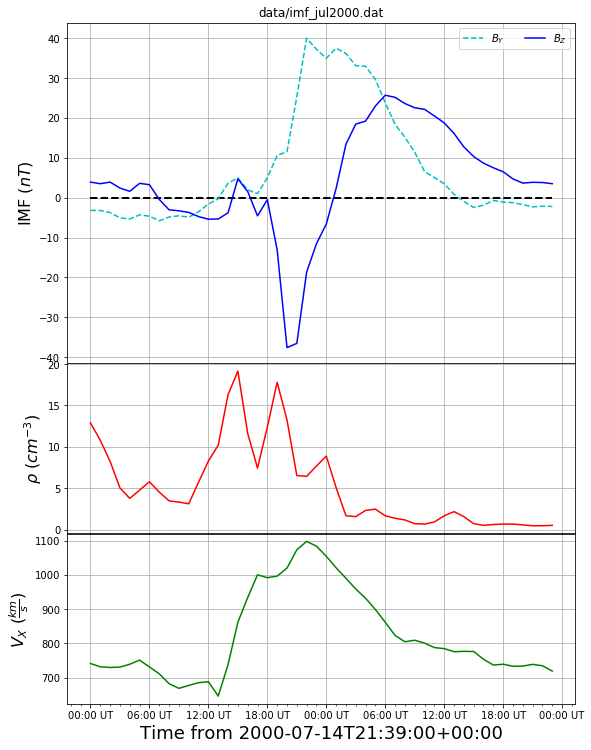

In [17]:
from example_imf import ImfData
imf = ImfData('data/imf_jul2000.dat')
print(imf)
print(imf.keys())
print(imf['bz'][:5])
print('The mean IMF Bz is {}nT'.format(imf['bz'].mean()))
print(imf['time'][:5])
imf.calc_epsilon()
print(imf)
imf.keys()
imf.plot_imf()

So what did we do here?  Let's break it down line by line:

* First, we *instantiated* an object.  Specifically, we created a new object, `imf`, of class `ImfData`.  When creating it, we handed it the name of a IMF data file to read.
* Next, to see what this object looks like, we printed it to screen.  We can customize exactly what we see when we do this.
* `ImfData` is a sub-class of a dictionary- this means it works like a dictionary with new features.  Each *value* is an array of data (e.g., magnetic field data); the *key* is the name of the data inside the array.  We can explore the data like it's a dictionary.
* The nested values are Numpy arrays.  This means we can slice them and access their object methods, including `.mean()`.
* Next, we can use tab-complete to see there are many object methods here.  Specifically, we can calculate the epsilon parameter for solar-wind/magnetosphere coupling with a quick call.  It adds a new value to the dictionary.
* Finally, we use an object method to make a quick look plot.  This gives us a well-formatted plot to summarize the data.

Contrast this with a procedural way of doing this, or an approach that does not use dictionaries.  You need many functions that know how to handle your data structure.  They may be scattered in different subroutines or modules.  With an OO approach, the functions are *methods* attached to the object- we can't lose them.  The dictionary approach makes it easier to organize our data; we see that our epsilon value gets sorted directly with its peers.  All of this can be easily sorted into a script that does this in an automated fashion.

Summary
------
I hope this very short introduction gives you the flavor of working in Python.  There's so much more to explore, however.  Consider checking out the following packages:

* The **os** module, which allows us to interact with the operating system, including making directories, moving and deleting.
* The **glob** module, which allows us to use linux-like wildcards to glob a list of files.
* **urllib**, which handles creating URLs and opening websites like files.
* **re**, the regular expression library.
* **argparse**, a library for creating and parsing Unix-like command line arguments for Python scripts.

There's always so much more, but this is a start.